In [ ]:
!pip install matplotlib

In [ ]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregando a base de dados
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Professional/IFES/Periodos/2023.2/Inteligência Artificial - 60h (Gustavo Maia)/Atividades/Listas/L1/Exer-1.csv", sep=",")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Dividindo Classe e Previsores
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
previsores = scaler.fit_transform(df.iloc[:, :13].values)
classe = df.iloc[:, 13].values

14

In [ ]:
# Fazendo o LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

labelencoder = LabelEncoder()
classe_dummy = to_categorical(labelencoder.fit_transform(classe))

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe_dummy, test_size=0.25)

In [ ]:
# Criando a rede
from keras.models import Sequential
from keras.layers import Dense

classificador = Sequential()
classificador.add(Dense(units = 2, activation = 'softmax', kernel_initializer = 'random_uniform', input_dim = len(df.columns)-1))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])


history = classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 5, epochs = 200, validation_split=0.3)

Epoch 1/200
32/32 [==============================] - 1s 8ms/step - loss: 0.6940 - categorical_accuracy: 0.5190 - val_loss: 0.6880 - val_categorical_accuracy: 0.5217
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - categorical_accuracy: 0.5823 - val_loss: 0.6753 - val_categorical_accuracy: 0.5507
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6657 - categorical_accuracy: 0.6646 - val_loss: 0.6627 - val_categorical_accuracy: 0.5942
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6534 - categorical_accuracy: 0.6962 - val_loss: 0.6516 - val_categorical_accuracy: 0.6667
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6423 - categorical_accuracy: 0.6962 - val_loss: 0.6402 - val_categorical_accuracy: 0.7101
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6333 - categorical_accuracy: 0.7152 - val_loss: 0.6300 - val_categorical_accuracy: 0.7101
Epoch 7/20

In [ ]:
# Printando os pesos calculados da rede
pesos = classificador.get_weights()

for i, layer_pesos in enumerate(pesos):
    print(f"Camada {i} - Pesos:\n")
    print(layer_pesos)

Camada 0 - Pesos:

[[ 0.27020937 -0.35027224]
 [ 0.54069227 -0.4834549 ]
 [-0.9443378   0.9081056 ]
 [ 0.5554784  -0.63098735]
 [ 0.37072253 -0.41084284]
 [-0.34276187  0.33106092]
 [-0.7837527   0.81993276]
 [-0.9843629   1.0030543 ]
 [ 0.36416957 -0.42529806]
 [ 1.0697843  -1.0478003 ]
 [-0.48933902  0.5586453 ]
 [ 1.3290408  -1.3032366 ]
 [ 0.473181   -0.49759102]]
Camada 1 - Pesos:

[-0.30927035  0.30927035]


In [ ]:
# Matriz de confusão e outras métricas
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

resultado = classificador.evaluate(previsores_teste, classe_teste)
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

acuracia = accuracy_score(classe_teste2, previsoes2)
precisao = precision_score(classe_teste2, previsoes2, average="micro")
recall = recall_score(classe_teste2, previsoes2, average="micro")
f1score = f1_score(classe_teste2, previsoes2, average="micro")
matriz = confusion_matrix(classe_teste2, previsoes2)

3/3 [==============================] - 0s 4ms/step


In [ ]:
# Printando as métricas e a matriz de confusão
print('Acurácia: %f' % acuracia)
print('Precision: %f' % precisao)
print('Recall: %f' % recall)
print('F1-Score: %f' % f1score)
print(matriz)

Acurácia: 0.842105
Precision: 0.842105
Recall: 0.842105
F1-Score: 0.842105
[[29  8]
 [ 4 35]]


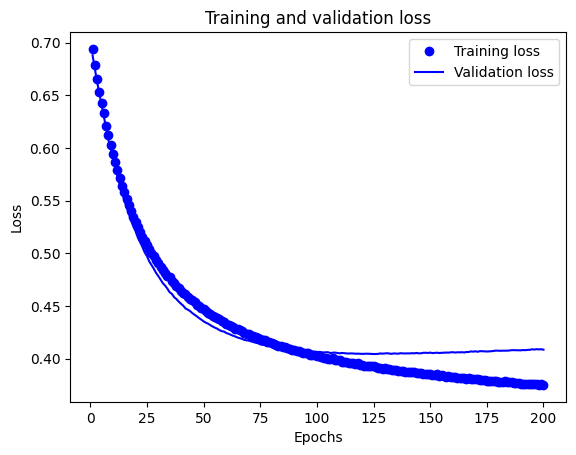

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
#history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = np.arange(1, len(val_loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

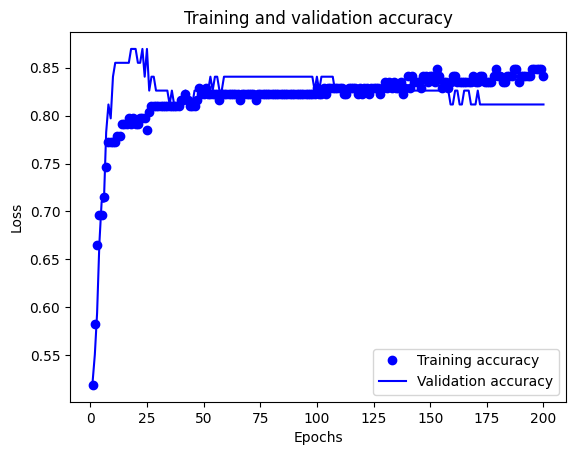

In [ ]:
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()